In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statistics import mean

train_airbnb_df_c = pd.read_csv("/Users/albane/Desktop/ML/ml-project/data/train_airbnb_berlin_cleaned.csv")
data_train = pd.read_csv("/Users/albane/Desktop/ML/ml-project/data/data_train.csv")
data_val = pd.read_csv("/Users/albane/Desktop/ML/ml-project/data/data_val.csv")
data_test = pd.read_csv("/Users/albane/Desktop/ML/ml-project/data/data_test.csv")
print(len(data_train), len(data_val), len(data_test))

columns = list(data_train.columns)
columns.remove('Price')
X_train = data_train[columns]
y_train = data_train['Price']
X_val = data_val[columns]
y_val = data_val['Price']
X_test = data_test[columns]
y_test = data_test['Price']

9772 2444 3054


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9772 entries, 0 to 9771
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Host Since                                   9772 non-null   float64
 1   Host Response Time                           9772 non-null   float64
 2   Is Superhost                                 9772 non-null   float64
 3   Latitude                                     9772 non-null   float64
 4   Longitude                                    9772 non-null   float64
 5   Is Exact Location                            9772 non-null   float64
 6   Accomodates                                  9772 non-null   float64
 7   Bathrooms                                    9772 non-null   float64
 8   Bedrooms                                     9772 non-null   float64
 9   Beds                                         9772 non-null   float64
 10  

In [5]:
train_airbnb_df_c['Price'].describe()

count    15270.000000
mean        60.043680
std         47.661471
min          8.000000
25%         32.000000
50%         49.000000
75%         70.000000
max        900.000000
Name: Price, dtype: float64

See the proportion of the categories for feature Accomodates

In [6]:
print("Value counts for feature Accomodates in cleaned dataset")
print(train_airbnb_df_c["Accomodates"].value_counts())
print("Value counts for feature Accomodates in train dataset")
print(data_train["Accomodates"].value_counts())
print("Value counts for feature Accomodates in val dataset")
print(data_val["Accomodates"].value_counts())
print("Value counts for feature Accomodates in test dataset")
print(data_test["Accomodates"].value_counts())

Value counts for feature Accomodates in cleaned dataset
2.0     8323
4.0     2183
3.0     1846
1.0     1703
6.0      500
5.0      462
8.0       95
7.0       77
9.0       36
10.0      32
12.0      12
16.0       1
Name: Accomodates, dtype: int64
Value counts for feature Accomodates in train dataset
0.090909    5305
0.272727    1407
0.181818    1226
0.000000    1071
0.454545     309
0.363636     296
0.636364      60
0.545455      42
0.727273      26
0.818182      23
1.000000       7
Name: Accomodates, dtype: int64
Value counts for feature Accomodates in val dataset
0.090909    1347
0.272727     334
0.000000     293
0.181818     262
0.454545      91
0.363636      83
0.545455      12
0.636364       9
0.727273       7
0.818182       5
1.000000       1
Name: Accomodates, dtype: int64
Value counts for feature Accomodates in test dataset
0.090909    1671
0.272727     442
0.181818     358
0.000000     339
0.454545     100
0.363636      83
0.636364      26
0.545455      23
0.818182       4
1.0000

Plot Prices as a function of Accomodates (Pearson coefficient = 0.5)

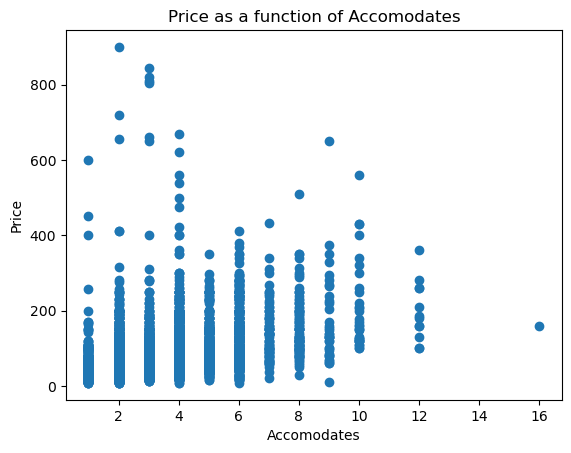

In [7]:
accomodates = train_airbnb_df_c["Accomodates"]
prices = train_airbnb_df_c["Price"]
plt.scatter(accomodates, prices)
plt.xlabel("Accomodates")
plt.ylabel("Price")
plt.title("Price as a function of Accomodates")
plt.show()

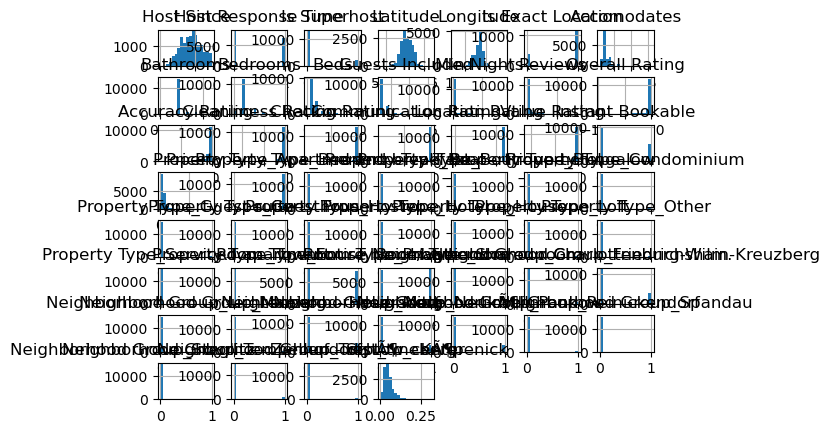

<Figure size 15000x15000 with 0 Axes>

In [19]:
from matplotlib import pyplot as plt
figure = train_airbnb_df_c.hist(bins=18)
plt.figure(figsize=(150,150))
plt.show()

### Correlations with price

In [20]:
coeffs, cols = [], []
columns = list(train_airbnb_df_c.columns)
for col in columns:
    if col != 'Price':
        cols += [col]
        corr, _ = pearsonr(train_airbnb_df_c[col], train_airbnb_df_c["Price"])
        coeffs += [corr]
data = {}
for i in range(len(cols)):
    data[cols[i]] = coeffs[i]
sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1])}

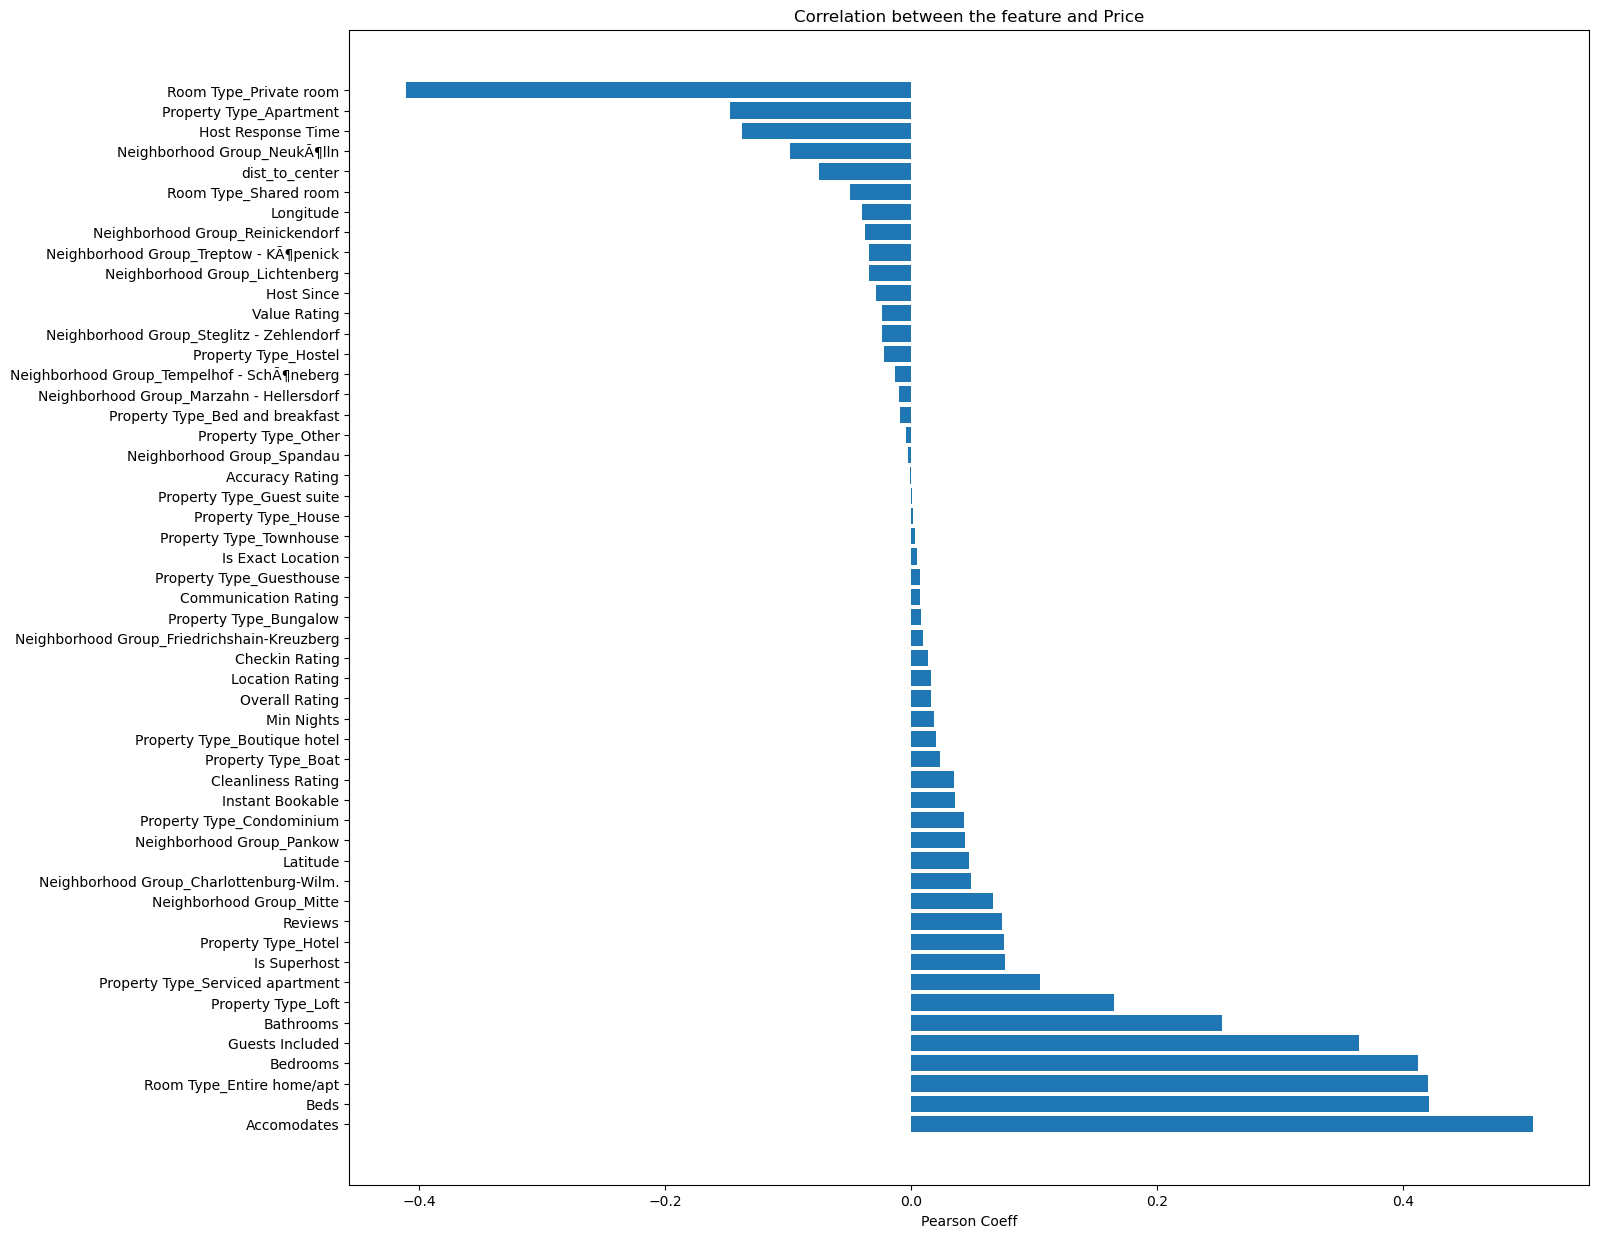

In [21]:
plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(16, 15)
performance = 100.0

cols = list(sorted_data.keys())
coeffs = list(sorted_data.values())
ax.barh(np.arange(len(cols)), coeffs, align='center')
ax.set_yticks(np.arange(len(cols)), labels=cols)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Pearson Coeff')
ax.set_title('Correlation between the feature and Price')

plt.show()

### Box plot for features outliers

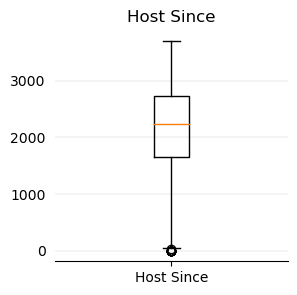

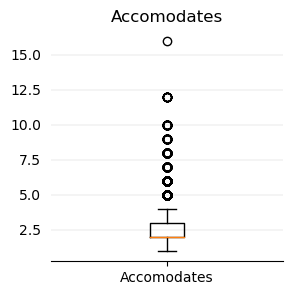

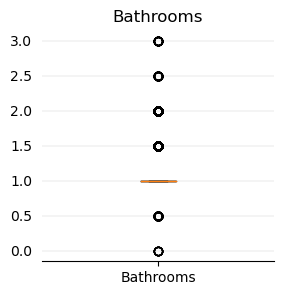

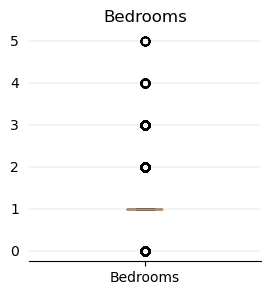

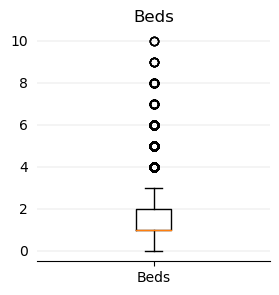

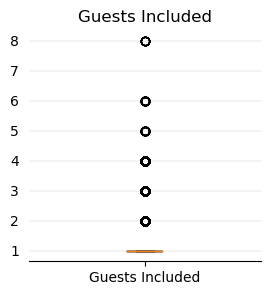

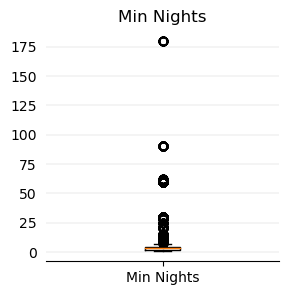

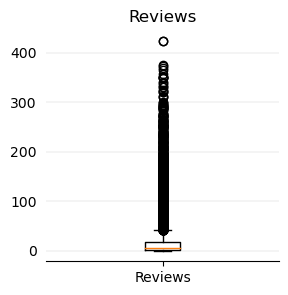

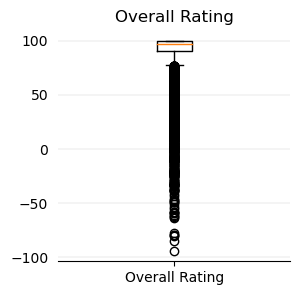

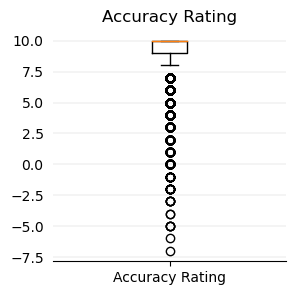

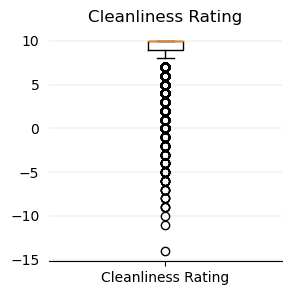

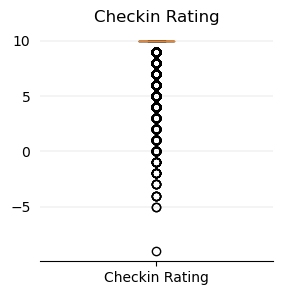

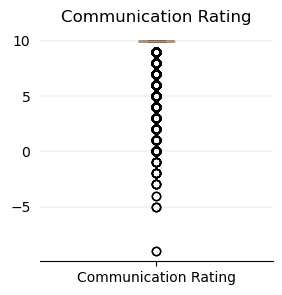

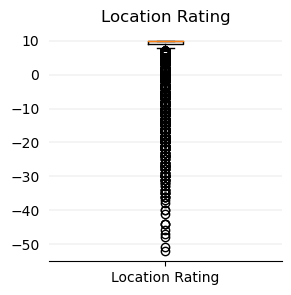

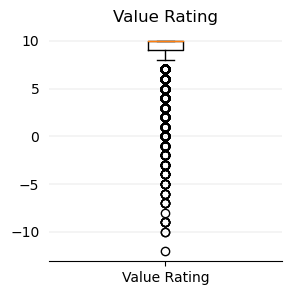

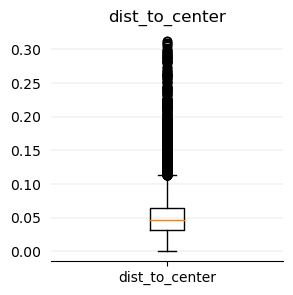

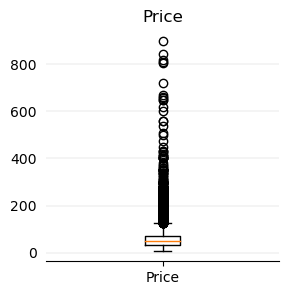

In [22]:
columns = [
    'Host Since',
    # 'Is Superhost',
    # 'Is Exact Location',
    'Accomodates',
    'Bathrooms',
    'Bedrooms',
    'Beds',
    'Guests Included',
    'Min Nights',
    'Reviews',
    'Overall Rating',
    'Accuracy Rating',
    'Cleanliness Rating',
    'Checkin Rating',
    'Communication Rating',
    'Location Rating',
    'Value Rating',
    # 'Instant Bookable',
    # 'Business Travel Ready',
    'dist_to_center',
    'Price'
]
for column in columns:
    # Visualize petal length distribution for all species
    fig, ax = plt.subplots(figsize=(3, 3))
    # Remove top and right border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Remove y-axis tick marks
    ax.yaxis.set_ticks_position('none')
    # Add major gridlines in the y-axis
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    # Set plot title
    ax.set_title(column)
    ax.boxplot(train_airbnb_df_c[column].dropna().to_numpy(), labels=[column])
    # ax.set_ylim(0, 300)
    plt.show()